<a href="https://colab.research.google.com/github/sultanbst123/Kaggle-Disaster-Tweets/blob/main/Disaster_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster tweet

## Library & File

In [ ]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 42.8 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 49.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install contractions

     |████████████████████████████████| 321 kB 5.2 MB/s 
     |████████████████████████████████| 284 kB 51.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85444 sha256=a0e5b07d4d98bcec2f879fee0ca2d5699836649664d47b311f822ced5e0b6f4f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#basic library
import numpy as np
import pandas as pd
import random
import os 
import re
 
#deep learning library
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_addons as tfa 

#visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
 
#text preprocesing library
import nltk
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, mean_squared_log_error, log_loss, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
# transformers library 

from transformers import DistilBertTokenizerFast, BertTokenizerFast #tokenizer
 
from transformers import TFDistilBertModel, DistilBertConfig #distilbert
from transformers import TFBertModel, BertConfig #bert

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#setting seed 
def set_seed(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


set_seed()

In [ ]:

train = pd.read_csv("/content/drive/MyDrive/Nlp disaster/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Nlp disaster/test.csv")

# Submission
sub = pd.read_csv("/content/drive/MyDrive/Nlp disaster/sample_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
train.duplicated().sum()

0

## EDA

0    0.57034
1    0.42966
Name: target, dtype: float64

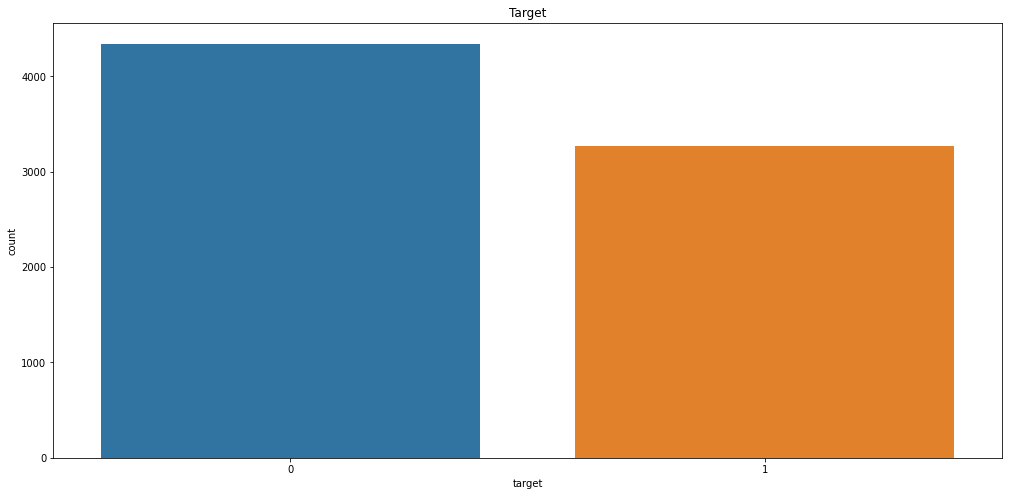

In [ ]:
# target

# disaster == 1
# not-disaster == 0

plt.figure(figsize=(17, 8)) 
sns.countplot(train.target) 
plt.title("Target")
 
train.target.value_counts(normalize=True)

In [ ]:
# Keyword

train.keyword.value_counts()

# rata disaster berdasrkan keyword

train.groupby("keyword")["target"].mean().to_frame().sort_values("target", ascending=False).style.bar(subset="target", color="green")

,target
keyword,
debris,1.000000
wreckage,1.000000
derailment,1.000000
outbreak,0.975000
oil%20spill,0.973684
typhoon,0.973684
suicide%20bombing,0.969697
suicide%20bomber,0.967742
bombing,0.931034


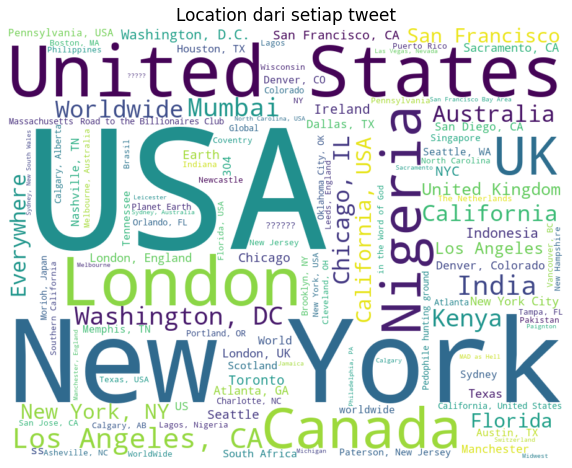

In [ ]:
# Location

train.location.value_counts()

def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 900, height = 700,
                          background_color ='white',
                          min_font_size = 10
                         ).generate_from_frequencies(data.value_counts())
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off")
    plt.title(title,fontsize=17)
    plt.show()

wordCloud_generator(train.location,"Location dari setiap tweet")

In [ ]:
# text

In [ ]:

# berdasarkan kata
train_kata = train.text.str.split().str.len()
test_kata = test.text.str.split().str.len()

#berdasarkan huruf dan sejenisnya 
train_huruf = train.text.str.len()
test_huruf = test.text.str.len()

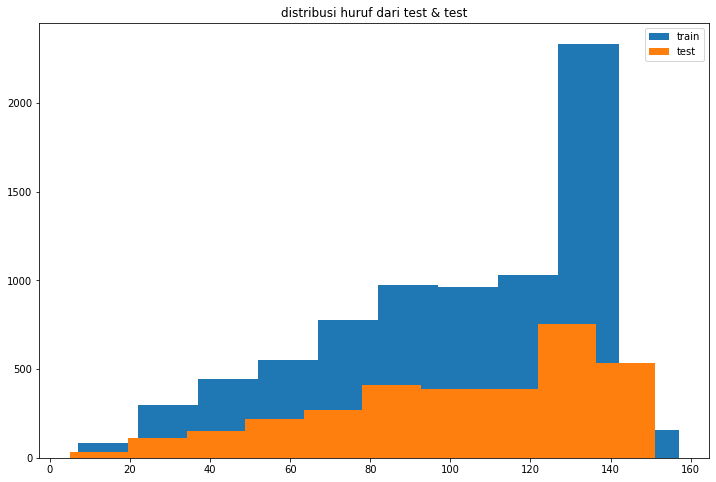

In [ ]:
plt.subplots(figsize=(12, 8))
plt.hist(train_huruf,label="train")
plt.hist(test_huruf,label="test")
plt.title("distribusi huruf dari test & test") 
plt.legend()

In [ ]:
print(f"total kata dari train: {train_kata.sum()} kata") 
print(f"total kata dari test: {test_kata.sum()} kata")

total kata dari train: 113461 kata
total kata dari test: 48832 kata


In [ ]:
print("descriptive analysis dari train")
print(train_kata.describe())
print(" ") 
print("descriptive analysis dari test")
print(test_kata.describe())

descriptive analysis dari train
count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: text, dtype: float64
 
descriptive analysis dari test
count    3263.000000
mean       14.965369
std         5.783576
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: text, dtype: float64


## Cleaning

In [ ]:
#mengubah kata-kata singkat / contractions type_1 
def cont_1(tweet): 
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "we are", tweet)
    tweet = re.sub(r"That's", "that is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "what is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "there is", tweet)
    tweet = re.sub(r"He's", "he is", tweet)
    tweet = re.sub(r"It's", "it is", tweet)
    tweet = re.sub(r"You're", "you are", tweet)
    tweet = re.sub(r"I'M", "i am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "i am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "i am", tweet)
    tweet = re.sub(r"I'm", "i am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "i have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "we have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "you all", tweet)
    tweet = re.sub(r"Weren't", "were not", tweet)
    tweet = re.sub(r"Didn't", "did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "that is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "i would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "you are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "i will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "they are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "i would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "i have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "i will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "i would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "i have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "i will", tweet)
    tweet = re.sub(r"I'd", "i would", tweet)
    tweet = re.sub(r"Let's", "let us", tweet)
    tweet = re.sub(r"you'd", "you would", tweet)
    tweet = re.sub(r"It's", "it is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "have not", tweet)
    tweet = re.sub(r"Could've", "could have", tweet)
    tweet = re.sub(r"amp", "&", tweet)
    tweet = re.sub(r"<br /><br />", " ", tweet)
    return tweet

In [ ]:
#contractions type_2
def cont_2(tweet):
    ts = tweet.split() # harus pakai split perkata 
    tweet = " ".join([contractions.fix(words) for words in ts])

    return tweet

In [ ]:

# hapus emoji 

def emoji(tweet): 
    emoji_pattern = re.compile("["        
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text =  emoji_pattern.sub(r"", tweet)
 
    return text

In [ ]:
#menghapus semua simbol, white space dan @user mention
def remove_punc(tweet): 
    #tweet = re.sub(r"@\S", "", x)
    #tweet = re.sub(r"#\S+', " ", x)    
    tweet = re.sub(r"[^a-zA-Z]"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    tweet = re.sub(r"https*\S+", " ", tweet) # remove links
    tweet = re.sub(r"http*\S+", " ", tweet)
    # cleaning up text
    tweet = re.sub(r"\"\w+", "", tweet) 
    tweet = re.sub(r"\w*\d+\w*", "", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"\s[^\w\s]\s", "", tweet)

    # remove single letters and numbers surrounded by space
    #tweet = re.sub(r"\s[a-z]\s|\s[0-9]\s", " ", tweet)
    return tweet

In [ ]:
#menghapus stopwords
def remove_stopwords(tweet):
    ts = word_tokenize(tweet) 
    ts_without_sw = [word for word in ts if not word in stopwords.words("english")]
    tweet = " ".join([str(elem) for elem in ts_without_sw])

    return tweet

In [ ]:
#lemmatizer
def lemma(tweet):
    ts = word_tokenize(tweet)
    wnl = WordNetLemmatizer()
    tweet = " ".join([wnl.lemmatize(words) for words in ts])

    return tweet

In [ ]:
#stemming mengunakan snowball
def stem(tweet):
    ts = word_tokenize(tweet)
    wnl = SnowballStemmer("english") 
    tweet = " ".join([wnl.stem(words) for words in ts])

    return tweet

In [ ]:
def clean(tweet):
    # // soft cleaning //
    #text
    tweet = tweet.lower()
    tweet = cont_1(tweet) # manual 
    tweet = cont_2(tweet) # auto

    # matikan jika mengunakan transformer
    tweet = emoji(tweet) 
    #symbol number special character
    tweet = remove_punc(tweet)   
    
    # // hard cleaning //
    #stopword and lemmatizer
    #tweet = remove_stopwords(tweet)
    #tweet = lemma(tweet)
    #tweet = stem(tweet)
    return tweet

In [ ]:
train["clean_text"] = train["text"].apply(clean)
test["clean_text"] = test["text"].apply(clean)

In [ ]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 900, height = 700,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off")
    plt.title(title,fontsize=17)
    plt.show()

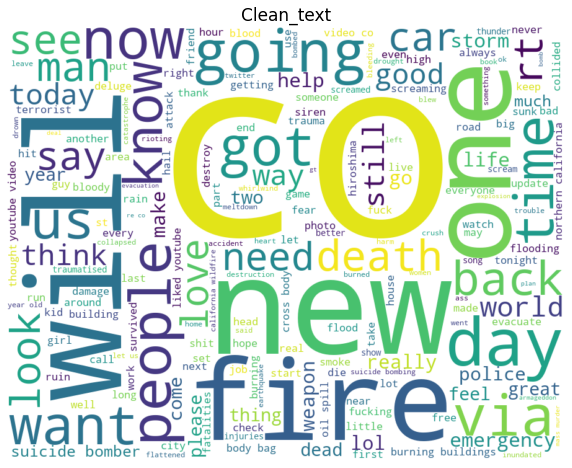

In [ ]:
wordCloud_generator(train["clean_text"], title="Clean_text")

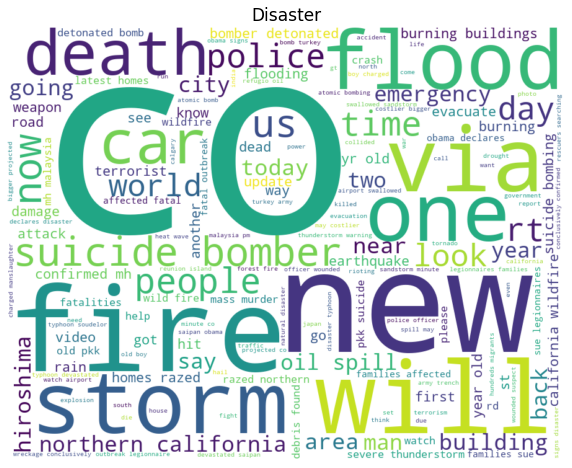

In [ ]:
wordCloud_generator(train["clean_text"][train.target == 1], title="Disaster")

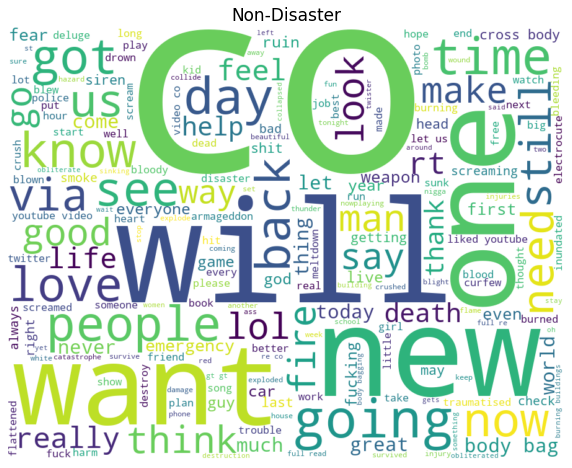

In [ ]:
wordCloud_generator(train["clean_text"][train.target == 0], title="Non-Disaster")

In [ ]:

# sebelum membersikan teks
print(f"Total kata dari train: {train.text.apply(lambda x: len(x.split())).sum()}")
print(f"Total kata dari test: {test.text.apply(lambda x: len(x.split())).sum()}")

Total kata dari train: 113461
Total kata dari test: 48832


In [ ]:

# setelah membersikan teks
print(f"Total kata dari train: {train.clean_text.apply(lambda x: len(x.split())).sum()}")
print(f"Total kata dari test: {test.clean_text.apply(lambda x: len(x.split())).sum()}")

Total kata dari train: 127733
Total kata dari test: 55034


In [ ]:
train.clean_text.sample(10)

2644    so you have a new weapon that can because un i...
2227    the f ing things i do for gishwhes just got so...
5448    dt georgegalloway rt galloway mayor the col po...
132     aftershock back to school kick off was great i...
6845    in response to trauma children of addicts deve...
5559     calum sos you look like you got caught in a r...
1765    my favorite lady came to our volunteer meeting...
1817     brianroemmele ux fail of emv people want to i...
6810    cannot find my ariana grande shirt this is a f...
4398    the murderous story of america s first hijacki...
Name: clean_text, dtype: object

In [ ]:
train.text.sample(10)

7138    @MrMikeEaton @Muazimus_Prime hill hill mountai...
2151    Cancers equate for around 25% of all deaths in...
4395    The Murderous Story Of AmericaÛªs First Hijac...
2508    The date for the release of EP03 DESOLATION is...
1378    On holiday to relax sunbathe and drink ... Put...
6825    (?EudryLantiqua?) Hollywood Movie About Trappe...
3877    Flattened all cartoony-like.\n'Whoa there Papa...
3465    #news #science London warship exploded in 1665...
6245    'Cooler than Freddie Jackson sippin' a milksha...
5664    Mary coming to Troy rescue. ?????? https://t.c...
Name: text, dtype: object

## Split & Tokenize

In [ ]:
# hanya untuk Bert dan distilbert

In [ ]:
train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [ ]:
x = train.clean_text
y = train.target
test_cp = test.clean_text

In [ ]:

# split 95:5
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.05, random_state=42)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((7232,), (381,), (7232,), (381,))

In [ ]:

# tokenize mengunakan bertfast, karena mempunyai kelebihan banyak 

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
MAX_LENGTH = 256 # <=== default
# 64,128,256,512,1024,2048 #pilih max length

# buat function tokenize 

def tokenize(sentences, tokenizer,max_length = MAX_LENGTH):
    input_ids, input_masks= [],[]
    for sentence in sentences:
        inputs = tokenizer.encode_plus(sentence,truncation=True, add_special_tokens=True, max_length=MAX_LENGTH, pad_to_max_length=True, 
                                             return_attention_mask=True, return_token_type_ids=False)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks,dtype='int32')

In [ ]:
# Encode train
X_train_ids, X_train_attention = tokenize(x_train,tokenizer)

# Encode valid
X_valid_ids, X_valid_attention = tokenize(x_val,tokenizer) 

# Encode test
X_test_ids, X_test_attention = tokenize(test_cp,tokenizer)

## TPU

In [ ]:

try: # <= detect TPU 
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # <= detect GPU/CPU
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  ['10.126.220.114:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.126.220.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.126.220.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 8


## Make Dataset & Hyper params

In [ ]:
BATCH_SIZE = 8 # * strategy.num_replicas_in_sync
AUTO = tf.data.AUTOTUNE

# learning rate for 3e-4, 1e-4, 5e-5, 3e-5.
EPOCHS = 5 
INIT_LR = 3e-5
MAX_LR = 3e-3
Wd = 1e-4

steps_per_epoch = len(x_train) // BATCH_SIZE
# Learning rate scheduler
clr = tfa.optimizers.Triangular2CyclicalLearningRate(
    initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    step_size= 2 * steps_per_epoch
)

# optimizer
SGD = tf.keras.optimizers.SGD(learning_rate=clr, momentum=0.9) 

ADAM = tf.keras.optimizers.Adam(learning_rate=INIT_LR)
ADAMW = tfa.optimizers.AdamW(learning_rate = INIT_LR,weight_decay = Wd)
ADABELIEF = tfa.optimizers.AdaBelief(learning_rate = INIT_LR, weight_decay = Wd)

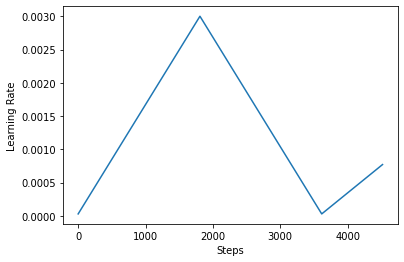

In [ ]:
step = np.arange(0, EPOCHS * steps_per_epoch)
lr = clr(step)
plt.plot(step, lr)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

In [ ]:

# jadikan Dataset 

train_ds = (
    tf.data.Dataset.from_tensor_slices(((X_train_ids, X_train_attention), y_train))
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(AUTO) 
)

val_ds = (
    tf.data.Dataset.from_tensor_slices(((X_valid_ids, X_valid_attention), y_val)) 
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test_ids, X_test_attention))
    .batch(BATCH_SIZE)
)

In [ ]:
train_ds, val_ds, test_ds

(<PrefetchDataset shapes: (((None, 256), (None, 256)), (None,)), types: ((tf.int32, tf.int32), tf.int64)>,
 <PrefetchDataset shapes: (((None, 256), (None, 256)), (None,)), types: ((tf.int32, tf.int32), tf.int64)>,
 <BatchDataset shapes: ((None, 256), (None, 256)), types: (tf.int32, tf.int32)>)

## DistilBert

In [ ]:

#fine tuning distilbert (jika belum puas dengan hasil) 

config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False

distilbert = TFDistilBertModel.from_pretrained('distilbert-base-uncased') #config = config)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# cek distbert apakah berubah setelah di tuning 

distilbert.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.15.0",
  "vocab_size": 30522
}

In [ ]:

#tambahkan bi-lstm(lstm dua arah) untuk mengextract informasi penting dari penyisipan, lalu ratakan jadi 1D mengunakan globalmaxpooling

def build_model(transformer, max_length=MAX_LENGTH):
  
    # input layers
    input_ids_in = layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
    input_masks_in = layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32')

    embedding_layer = transformer(input_ids_in, attention_mask=input_masks_in)[0]
    #cls_token = embedding_layer[:,0,:]
 
    X = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)  
    X = layers.GlobalMaxPool1D()(X)                            
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(64, activation="relu", kernel_initializer = "he_normal")(X)   
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(32, activation="relu", kernel_initializer = "he_normal")(X)   
    X = layers.Dropout(0.2)(X)    
    X = layers.Dense(1, activation='sigmoid')(X)
    model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)    
    
    #freeze distilbert layers 
    #for layer in model.layers[:3]:
    #    layer.trainable = False

    return model

In [ ]:
# buat ulang model di TPU
 
with strategy.scope(): # <=== with TPU
     transformer_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased",config = config)

     distilbert_model = build_model(transformer_model)
     
     distilbert_model.compile(optimizer = ADAMW, 
                              loss=tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.1), 
                              metrics =["accuracy"])

distilbert_model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 256)]        0           []                               
                                                                                                  
 tf_distil_bert_model_2 (TFDist  TFBaseModelOutput(l  66362880   ['input_token[0][0]',            
 ilBertModel)                   ast_hidden_state=(N               'masked_token[0][0]']           
                                one, 256, 768),                                                   
                                 hidden_states=None                                           

In [ ]:
# define cb

cp_best = f"best.h5"
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(cp_best, monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')

# fit
history = distilbert_model.fit(train_ds, validation_data = val_ds, 
                               epochs = EPOCHS, verbose = 1, callbacks = [cb_checkpt])

distilbert_model.load_weights(cp_best)

Epoch 1/5


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=int64>]


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=int64>]


904/904 [==============================] - ETA: 0s - loss: 0.5221 - accuracy: 0.7916

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=int64>]


904/904 [==============================] - 238s 192ms/step - loss: 0.5221 - accuracy: 0.7916 - val_loss: 0.4716 - val_accuracy: 0.8399
Epoch 2/5
904/904 [==============================] - 163s 180ms/step - loss: 0.4557 - accuracy: 0.8505 - val_loss: 0.4861 - val_accuracy: 0.8163
Epoch 3/5
904/904 [==============================] - 164s 181ms/step - loss: 0.4176 - accuracy: 0.8742 - val_loss: 0.4851 - val_accuracy: 0.8215
Epoch 4/5
904/904 [==============================] - 164s 181ms/step - loss: 0.3864 - accuracy: 0.8952 - val_loss: 0.6009 - val_accuracy: 0.7559
Epoch 5/5
904/904 [==============================] - 163s 181ms/step - loss: 0.3623 - accuracy: 0.9100 - val_loss: 0.5314 - val_accuracy: 0.7874


In [ ]:
loss, accuracy, = distilbert_model.evaluate(val_ds)

print(f"Loss accuracy: {round(loss * 100, 2)}")
print(f"Val accuracy: {round(accuracy * 100, 2)}%")

48/48 [==============================] - 3s 40ms/step - loss: 0.4716 - accuracy: 0.8399
Loss accuracy: 47.16
Val accuracy: 83.99%


In [ ]:

# prediksi Test dataset, mengu

y_true = distilbert_model.predict((X_test_ids, X_test_attention))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>]


In [ ]:
# check probability 

y_true

array([[0.52064556],
       [0.7396004 ],
       [0.77438426],
       ...,
       [0.78053784],
       [0.82324207],
       [0.63541305]], dtype=float32)

In [ ]:
# ini error 
#y_true = distilbert_model.predict(test_ds)

## Bert Base

In [ ]:

#fine tuning bert (jika belum puas dengan hasil) 

config = BertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False

bert = TFBertModel.from_pretrained('bert-base-uncased', config = config)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# cek bert apakah berubah setelah di tuning 

bert.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "attention_dropout": 0.2,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dropout": 0.2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:

#tambahkan bi-lstm(lstm dua arah) untuk mengextract informasi penting dari penyisipan, lalu ratakan jadi 1D mengunakan globalmaxpooling

def build_model(transformer, max_length=MAX_LENGTH):
  
    # input layers
    input_ids_in = layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
    input_masks_in = layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32')

    embedding_layer = transformer(input_ids_in, attention_mask=input_masks_in)[0]
    #cls_token = embedding_layer[:,0,:]
 
    X = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)  
    X = layers.GlobalMaxPool1D()(X)                            
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(256, activation="relu", kernel_initializer = "he_normal")(X)   
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(32, activation="relu", kernel_initializer = "he_normal")(X)   
    X = layers.Dropout(0.2)(X)    
    X = layers.Dense(1, activation='sigmoid')(X)
    model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)    
    
    #freeze bert layers 
    for layer in model.layers[:3]:
        layer.trainable = False

    return model

In [ ]:
# buat ulang model di TPU

with strategy.scope(): # <=== with TPU
     transformer_model = TFBertModel.from_pretrained('bert-base-uncased')#config=config) 

     bert_model = build_model(transformer_model)
     
     bert_model.compile(optimizer = ADABELIEF,
                        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.1),
                        metrics =["accuracy"])

bert_model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model_10 (TFBertModel)  TFBaseModelOutputWi  109482240  ['input_token[0][0]',            
                                thPoolingAndCrossAt               'masked_token[0][0]']           
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [ ]:
# define cb

cp_best_1 = f"best_1.h5"
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(cp_best_1, monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')


# fit, khusus untuk bert base pakai 10 epoch 
history = bert_model.fit(train_ds, validation_data = val_ds, 
                          epochs = 10, verbose = 1, callbacks = [cb_checkpt])

bert_model.load_weights(cp_best_1)

Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=int64>]


904/904 [==============================] - ETA: 0s - loss: 0.6571 - accuracy: 0.6323

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=int64>]


904/904 [==============================] - 167s 141ms/step - loss: 0.6571 - accuracy: 0.6323 - val_loss: 0.5299 - val_accuracy: 0.8005
Epoch 2/10
904/904 [==============================] - 114s 126ms/step - loss: 0.5363 - accuracy: 0.7761 - val_loss: 0.4803 - val_accuracy: 0.8294
Epoch 3/10
904/904 [==============================] - 114s 127ms/step - loss: 0.5068 - accuracy: 0.8034 - val_loss: 0.4768 - val_accuracy: 0.8399
Epoch 4/10
904/904 [==============================] - 112s 124ms/step - loss: 0.4928 - accuracy: 0.8166 - val_loss: 0.4912 - val_accuracy: 0.8294
Epoch 5/10
904/904 [==============================] - 115s 127ms/step - loss: 0.4906 - accuracy: 0.8119 - val_loss: 0.4686 - val_accuracy: 0.8399
Epoch 6/10
904/904 [==============================] - 116s 128ms/step - loss: 0.4832 - accuracy: 0.8153 - val_loss: 0.4655 - val_accuracy: 0.8451
Epoch 7/10
904/904 [==============================] - 112s 123ms/step - loss: 0.4782 - accuracy: 0.8211 - val_loss: 0.4704 - val_accura

In [ ]:
loss, accuracy, = bert_model.evaluate(val_ds)

print(f"Loss accuracy: {round(loss * 100, 2)}")
print(f"Val accuracy: {round(accuracy * 100, 2)}%")

48/48 [==============================] - 4s 49ms/step - loss: 0.4655 - accuracy: 0.8478
Loss accuracy: 46.55
Val accuracy: 84.78%


In [ ]:

# predict Test dataset, mengunakan bert base 

y_true = bert_model.predict((X_test_ids, X_test_attention))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>]


In [ ]:
y_true

array([[0.77522284],
       [0.89591926],
       [0.8721775 ],
       ...,
       [0.93399084],
       [0.8480264 ],
       [0.70441014]], dtype=float32)

## Submission

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Nlp disaster/sample_submission.csv")

In [ ]:
sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [ ]:
sub["target"] = np.round(y_true).astype("int")

In [ ]:
sub

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
sub.to_csv("submission_bert_1.csv", index=False)